In [1]:
import uproot as ur
import matplotlib.pyplot as plt
import k3d
import numpy as np
import awkward as ak

In [3]:
path = '/home/miguel/eic/eic_endcap_insert/'
name = '3degree'
events = ur.open(path+name+'.root:events')
arrays = events.arrays()
print(events.keys())

eventPath = '/home/miguel/unity/%s.txt'%(name)

['MCParticles', 'MCParticles/MCParticles.PDG', 'MCParticles/MCParticles.generatorStatus', 'MCParticles/MCParticles.simulatorStatus', 'MCParticles/MCParticles.charge', 'MCParticles/MCParticles.time', 'MCParticles/MCParticles.mass', 'MCParticles/MCParticles.vertex.x', 'MCParticles/MCParticles.vertex.y', 'MCParticles/MCParticles.vertex.z', 'MCParticles/MCParticles.endpoint.x', 'MCParticles/MCParticles.endpoint.y', 'MCParticles/MCParticles.endpoint.z', 'MCParticles/MCParticles.momentum.x', 'MCParticles/MCParticles.momentum.y', 'MCParticles/MCParticles.momentum.z', 'MCParticles/MCParticles.momentumAtEndpoint.x', 'MCParticles/MCParticles.momentumAtEndpoint.y', 'MCParticles/MCParticles.momentumAtEndpoint.z', 'MCParticles/MCParticles.spin.x', 'MCParticles/MCParticles.spin.y', 'MCParticles/MCParticles.spin.z', 'MCParticles/MCParticles.colorFlow.a', 'MCParticles/MCParticles.colorFlow.b', 'MCParticles/MCParticles.parents_begin', 'MCParticles/MCParticles.parents_end', 'MCParticles/MCParticles.daug

In [4]:
print(len(ak.flatten(arrays['HcalEndcapPInsertHitsContributions.time'])))
print(len(ak.flatten(arrays['HcalEndcapPInsertHits.position.z'])))

type(arrays['HcalEndcapPInsertHitsContributions.time'][:])

3068576
852825


awkward.highlevel.Array

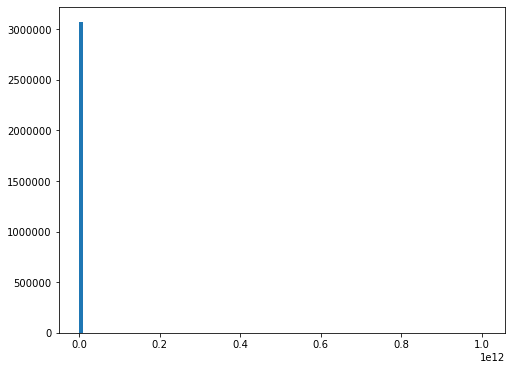

In [5]:
fig = plt.figure( figsize=(8, 6))

plt.hist(ak.flatten(arrays['HcalEndcapPInsertHitsContributions.time']),bins=100)

plt.show()



In [6]:
with open(eventPath, 'a') as f:
    f.write("")

In [7]:

def get_vector(data,varname='EcalBarrelScFiHits'):
    time_constant = 1.25
    print('getting data of container %s'%(varname))
    
    E = 1e6*data["%s.energy"%(varname)].array(library='np')
    pdgID = 1e6*data["%s.energy"%(varname)].array(library='np') #data["%s.truth.pdgID"%varname].array(library='np')
    t = 1e6*data["%s.energy"%(varname)].array(library='np')#time_constant*data["%s.truth.time"%varname].array(library='np')

    x = data["%s.position.x"%varname].array(library='np')
    y = data["%s.position.y"%varname].array(library='np')
    z = data["%s.position.z"%varname].array(library='np')

    #theta = events["%s.polar.theta"%varname].array(library='np')
    #phi = events["%s.polar.phi"%varname].array(library='np')

    print(len(E), ' ', len(x), ' ', len(y), ' ', len(z), ' ' , len(t))
    return E,x, y, z, t,pdgID

In [8]:
E = {}

x = {}
y = {}
z  = {}
t = {}
pdgID={}


In [14]:
hit_containers = ['HcalEndcapPInsertHits','LeakedHits']

cluster_containers = []
#cluster_containers = ['HcalEndcapPClusters','HcalBarrelClusters','HcalEndcapNClusters',
#                     'EcalEndcapNClusters','EcalBarrelScFiClusters','EcalBarrelImagingClusters','EcalEndcapPClusters']

In [15]:
#Hit container
for i in hit_containers:#,'TrackerBarrel','VertexBarrel']:
    E[i], x[i], y[i],z[i],t[i],pdgID[i] = get_vector(events,"%s"%i)
#    print(len(E[i]), '' , len(x[i]), ' ', len(y[i]), ' ', len(z[i]), ' ', len(t[i]), ' ' , len(pdgID[i]))


    
for i in cluster_containers:#,'TrackerBarrel','VertexBarrel']:
    E[i], x[i], y[i],z[i],t[i],pdgID[i] = get_vector(rec_events,"%s"%i)
    #print(len(E[i]), '' , len(x[i]), ' ', len(y[i]), ' ', len(z[i]), ' ', len(t[i]), ' ' , len(pdgID[i]))
    

#print(len(E['EcalBarrelScFiHits']))
#print(len(x['EcalBarrelScFiHits']))
#print(len(y['EcalBarrelScFiHits']))
#print(len(z['EcalBarrelScFiHits']))
#print(len(t['EcalBarrelScFiHits']))

getting data of container HcalEndcapPInsertHits
1000   1000   1000   1000   1000
getting data of container LeakedHits
1000   1000   1000   1000   1000


In [16]:
print(hit_containers)
print(cluster_containers)
containers = hit_containers + cluster_containers
print(containers)

['HcalEndcapPInsertHits', 'LeakedHits']
[]
['HcalEndcapPInsertHits', 'LeakedHits']


In [17]:
nevents = 11
print('nevents= %i'%nevents)
with open(eventPath, 'w') as f:      

    for ievt in range(nevents):
        print(ievt)
        if(ievt>10):
            continue
        print('Writing this stuff')
        f.write("Event \n")        
        f.write("Hits \n")  
        iterate = 0

        #f.write('\n')
    #    f.write("Events %i ##########(x,y,z,E,t,pdgID) ####################################\n"%ievt)        
        for key in hit_containers:
            #print(key)
            xcoord = x[key][ievt]
            ycoord = y[key][ievt]
            zcoord = z[key][ievt]
            ecoord = E[key][ievt]
            tcoord = t[key][ievt]
            pdgcoord = pdgID[key][ievt]
            #print('length of array: ', len(ecoord))
            print('length : ', len(ecoord))
            if len(ecoord) > 0:
                #f.write(str(key)+'-----------------------------------------------------------------\n')
                for (k, l, m, n, o,p) in zip(xcoord, ycoord, zcoord, ecoord, tcoord, pdgcoord):
                    #if (n==0):
                    #    n=000
                    o = 0.0
                    #if(o>30):
                    #    continue
                    #f.write("%2.3f %2.3f %2.3f %2.3f str(o)+" "+str(k)+" "+str(l)+" "+str(m)+" "+str(n))
                    f.write(str(o)+" "+str(k/1000.0)+" "+str(l/1000.0)+" "+str(m/1000.0)+" "+str(n)+"\n")
                    #f.write("%6.2f %6.2f %6.2f %6.2f %6.2f %6.0i"%(k,l,m,n,o,p))
                    #f.write('\n')
                    #print(str(o)+" "+str(k)+" "+str(l)+" "+str(m)+" "+str(n))
           
        f.write("Clusters \n")   
        for key in cluster_containers:
        #for key in ['HcalBarrelClusters','EcalBarrelImagingClusters']:#,'EcalBarrelScFiClusters']:
            if 'Hcal' in key:
                calotype = 'Hcal'
            else:
                calotype = 'Ecal'
            if 'Endcap' in key:
                tipo = 'Endcap'
            else: 
                tipo = 'Barrel'
            xcoord = x[key][ievt]
            ycoord = y[key][ievt]
            zcoord = z[key][ievt]
            ecoord = E[key][ievt]
            tcoord = t[key][ievt]
            #print('length : ', len(ecoord))
            if len(ecoord) > 0:
                for (k, l, m, n, o,p) in zip(xcoord, ycoord, zcoord, ecoord, tcoord, pdgcoord):
                    f.write(calotype + " " + tipo + " " +str(k/1000.0)+" "+str(l/1000.0)+" "+str(m/1000.0)+" "+str(n)+"\n")

nevents= 11
0
Writing this stuff
length :  273
length :  431
1
Writing this stuff
length :  796
length :  16
2
Writing this stuff
length :  923
length :  129
3
Writing this stuff
length :  828
length :  52
4
Writing this stuff
length :  1073
length :  11
5
Writing this stuff
length :  1090
length :  58
6
Writing this stuff
length :  539
length :  69
7
Writing this stuff
length :  885
length :  90
8
Writing this stuff
length :  906
length :  45
9
Writing this stuff
length :  527
length :  9
10
Writing this stuff
length :  735
length :  6
